In [1]:
import pandas as pd
import numpy as np

1. Consider the OR gate truth table as discussed in class
  a. Write a python code implementing logistic regression (using gradient
  descent) from scratch and use the same to replicate OR gate
  
  b. Modify the code for AND and XOR gates.
  Comment on the meaning of the converged weights you obtained above.


In [2]:
#OR_gate
OR_gate = pd.DataFrame([])
OR_gate['x1'] = [0,0,1,1]
OR_gate['x2'] = [0,1,0,1]
OR_gate['y']  = [0,1,1,1]

In [3]:
#AND_gate
AND_gate = pd.DataFrame([])
AND_gate['x1'] = [0,0,1,1]
AND_gate['x2'] = [0,1,0,1]
AND_gate['y']  = [0,0,0,1]

In [4]:
#XOR Code
XOR_gate = pd.DataFrame([])
XOR_gate['x1'] = [0,0,1,1]
XOR_gate['x2'] = [0,1,0,1]
XOR_gate['y']  = [0,1,1,0]

In [5]:
def sigmoid(w,x):
  a = np.dot(w,x)
  return 1/(1+np.exp(-a))

#caluclate binary loss
def binary_loss(y_hat,y_i):
  if y_i == 0:
    return -np.log(1-y_hat)
  if y_i == 1:
    return -np.log(y_hat)

#caluclating total loss
def total_binary_loss(X,Y,W):
  loss = 0
  for i in range(len(X)):
    y_hat_i = sigmoid(W,X[i])
    loss += binary_loss(y_hat_i,Y[i])
  return loss/len(X)

#gradient descent for logistic regression 
def do_logistic_regression(X,Y,num_epochs = 1000,alpha = 0.1):
  w = np.ones(X.shape[-1])
  total_loss = []
  total_loss.append(total_binary_loss(X,Y,w))
  for i in range(num_epochs+1):
    grad = 0
    for j in range(len(X)):
      grad += (sigmoid(w,X[j])-Y[j])*X[j]
    w = w - (alpha*1/len(X))*grad
    total_loss.append(total_binary_loss(X,Y,w))
  return w,total_loss
      




In [6]:
#initializing parameters
num_epochs = 10000
alpha      = 0.1

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

#predictions on otained weights
def predict_binary_logistic_regression(weight_vector,X):
  X = np.array(X)
  pred = []
  for i in range(len(X)):

    a = sigmoid(weight_vector,X[i])

    a = 0 if a < 0.5 else 1
    pred.append(a)

  return pred


OR_gate
Accuracy:  1.0 Loss:  0.009252638212462864
Weights:  [ 8.67148656  8.67148656 -3.87061964]
-----------------------------


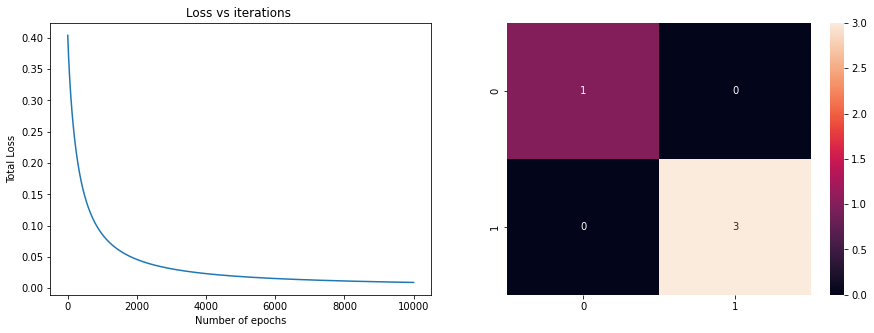

AND_gate
Accuracy:  1.0 Loss:  0.0173900148372588
Weights:  [  7.41714719   7.41714719 -11.298321  ]
-----------------------------


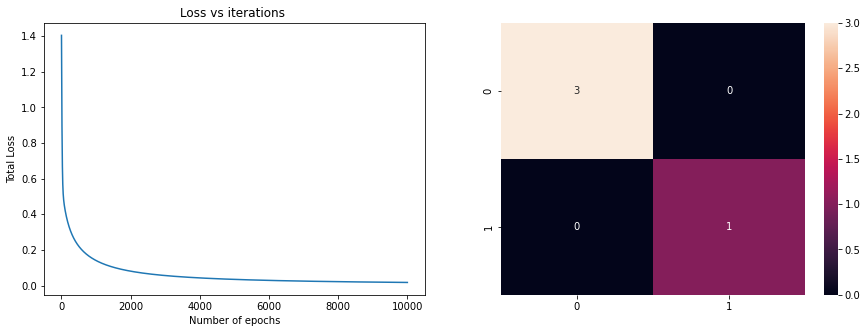

XOR_gate
Accuracy:  0.5 Loss:  0.6931471805599453
Weights:  [ 2.47865765e-16  2.47865765e-16 -3.30699561e-16]
-----------------------------


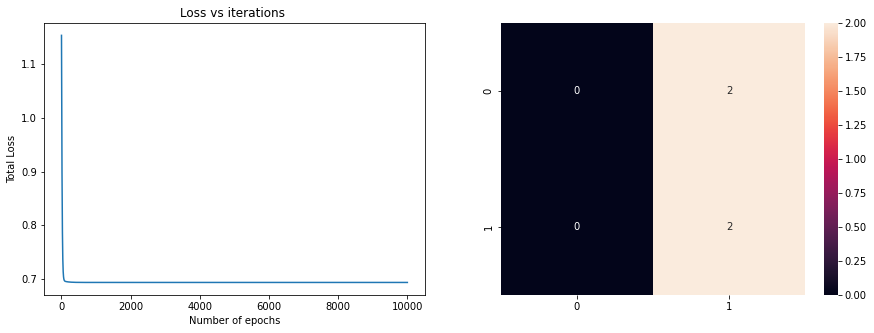

In [8]:
weights_learnt = []
loss_vs_iter = []
titles =['OR_gate','AND_gate','XOR_gate']
z=0
for df in [OR_gate,AND_gate,XOR_gate]:
  train = df.copy(deep = True )
  train['bias'] = 1
  X = train.drop(columns = ['y'],axis = 1)
  Y = train['y']
  weights,loss = do_logistic_regression(np.array(X),np.array(Y),num_epochs,alpha) 
  weights_learnt.append(weights)
  loss_vs_iter.append(loss)
  acc =  accuracy_score(np.array(Y),predict_binary_logistic_regression(weights,np.array(X)))
  print(titles[z])
  z+=1
  print('Accuracy: ', acc, 'Loss: ',loss[-1])
  print("Weights: ",weights)
  print('-----------------------------')
  plt.figure(figsize = (15,5))
  plt.subplot(121)
  plt.plot(np.arange(len(loss)),loss)
  plt.title('Loss vs iterations ')
  plt.xlabel("Number of epochs")
  plt.ylabel("Total Loss")
  plt.subplot(122)
  cm = confusion_matrix(np.array(Y),predict_binary_logistic_regression(weights,np.array(X)))
  sns.heatmap(cm, annot = True, cbar = True)
  plt.show()



Now, let us try to interpret the value of weights to which the algorithm converged.

**The weights to which the logistic regression converged are the coefficients of the best hyperplane which seperates the classes. **

Consider the following illustration: 

OR_gate
Weights learnt:  [ 8.67148656  8.67148656 -3.87061964]


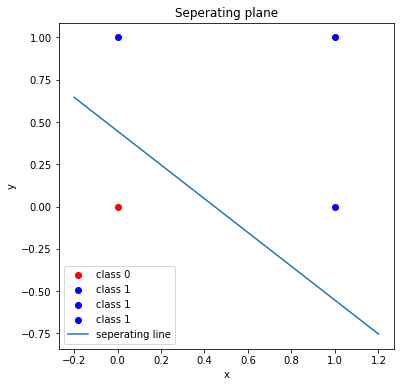

AND_gate
Weights learnt:  [  7.41714719   7.41714719 -11.298321  ]


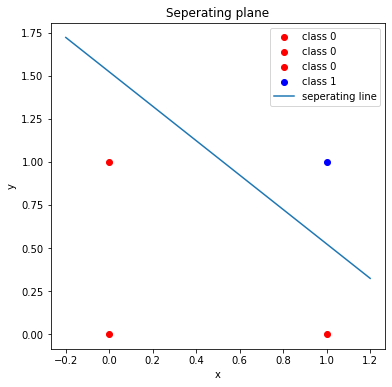

XOR_gate
Weights learnt:  [ 2.47865765e-16  2.47865765e-16 -3.30699561e-16]


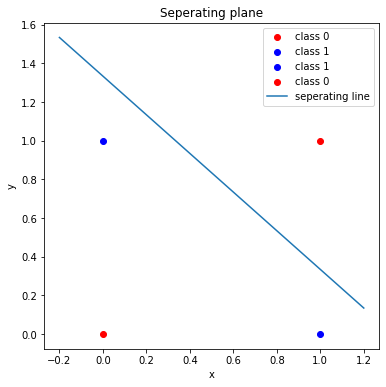

In [9]:


df = [OR_gate,AND_gate,XOR_gate]
titles =['OR_gate','AND_gate','XOR_gate']
for i in range(len(weights_learnt)):
  weights = weights_learnt[i]
  print(titles[i])
  print('Weights learnt: ',weights)
  x = np.linspace(-0.2,1.2)
  y = (-1*weights[0]*x - weights[2])/weights[1]
  X = np.array(df[i])
  plt.figure(figsize = (6,6))
  for point in range(len(X)):
    x1 = X[point][0]
    x2 = X[point][1]
    cls = X[point][2]
    color = 'b' if cls==1 else 'r'
    plt.scatter(x1,x2,c = color,label = 'class 1' if color == 'b' else 'class 0')
  plt.plot(x,y,label = 'seperating line')
  plt.title('Seperating plane')
  plt.xlabel('x')
  plt.ylabel('y')
  plt.legend()
  plt.show()


Thus, the learned weights represent the hyperplane that best seperates the two classes of data if it was linearly seperable. The above plots illustrates the learnt decision boundary for OR, AND and XOR respectively. Thus, the above analysis helps us to conclude that the logistic regression is a linear classfier and performs with very high accuracy on linearly seperable data.

**Summary:**

1. Logistic regression is a linear classifier
2. The loss is computed using cross_entropy loss
3. The output of the algorithm is the likelihood that it belongs to class zero (P(Y=0/x) = sigmoid(x)).
4. In the context of binary classification, the computed weights represent that the best hyperplane that best seperates the linearly seperable data.
5. XOR gate is not linearly seperable, thus logistic regression did not seperate both classes with high accuracy(only able to classify 3 out of 4 points correctly) 
6. Logistic regression acheived an accuracy of 100% on the OR and AND gate as the data is linearly seperable.
  


2. Download the IRIS dataset (https://archive.ics.uci.edu/ml/datasets/iris)

  a. Write gradient descent code to perform multiclass classification
  using the entire dataset for training

  b. Report on the confusion matrix for this

In [10]:
head = ['sepal length in cm','sepal width in cm','petal length in cm','petal width in cm','class'] #setting the header

In [11]:
f1 = pd.read_csv('bezdekIris.data',sep=',',names = head)       #loading the file
f1

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [12]:
f2 = pd.read_csv('iris.data',sep=',',names = head)
f2

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [13]:
f1.columns

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class'],
      dtype='object')

In [14]:
data = pd.get_dummies(f1,columns=['class'])
data.head()                         #One hot encoding of classes

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,class_Iris-setosa,class_Iris-versicolor,class_Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [15]:
data.columns

Index(['sepal length in cm', 'sepal width in cm', 'petal length in cm',
       'petal width in cm', 'class_Iris-setosa', 'class_Iris-versicolor',
       'class_Iris-virginica'],
      dtype='object')

In [16]:
#Splitting into X and Y
X = data.drop(columns = ['class_Iris-setosa', 'class_Iris-versicolor','class_Iris-virginica'],axis = 1)
X['bias'] = 1
Y = data[['class_Iris-setosa', 'class_Iris-versicolor','class_Iris-virginica']]


In [17]:
#parameters of model
num_classes = len(Y.columns)
weight_vector = np.ones((num_classes,len(X.columns))) # -> 3 classes 3 weight vectors  
alpha = 0.1 #-> learning rate
num_epochs = 2000

In [18]:
from scipy.special import softmax

#defining cross entropy loss
def cross_entropy_loss(weight_vector,x_i,y_i):
  z = np.dot(weight_vector,x_i)
  predicted_distribution = softmax(z)
  loss = -np.dot(y_i,np.log(predicted_distribution))
  return loss

#defining total loss
def total_loss(weight_vector,X,Y):
  if len(X) !=len(Y):
    print('Please input valid dataset.Input-output data length not matching')
    return
  
  total_loss = 0
  for i in range(len(X)):

    total_loss += cross_entropy_loss(weight_vector,np.array(X.iloc[i]),np.array(Y.iloc[i]))

  total_loss = total_loss/len(X)

  return total_loss

#Batch gradient descent for Multiclass classification
def gradient_descent_multiclass(X,Y,alpha,num_epochs):
  if len(X) !=len(Y):
    print('Please input valid dataset.Input-output data length not matching')
    return
  
  weight_vector = np.ones((num_classes,len(X.columns))) # -> here 3 classes, so 3 weight vectors  
  loss = []
  for epoch in range(num_epochs):
    for j in range(len(weight_vector)):
      sum = np.zeros(len(weight_vector[j]))
      for i in range(len(X)):
        class_y = np.argmax(np.array(Y.iloc[i]))
        a = 1 if class_y == j else 0

        sum += (a - softmax(np.dot(weight_vector,np.array(X.iloc[i])))[j])*np.array(X.iloc[i])
      
      weight_vector[j] += (alpha*(1/len(X))*sum)

    loss.append(total_loss(weight_vector,X,Y))  
  
  return weight_vector,loss


#Stochastic gradient descent for Multiclass classification
def gradient_descent_multiclass_sgd(X,Y,alpha,num_epochs):
  if len(X) !=len(Y):
    print('Please input valid dataset.Input-output data length not matching')
    return
  
  weight_vector = np.ones((num_classes,len(X.columns))) # -> here 3 classes, so 3 weight vectors  
  loss = []
  for epoch in range(num_epochs):
    for j in range(len(weight_vector)):
      for i in range(len(X)):
        class_y = np.argmax(np.array(Y.iloc[i]))
        a = 1 if class_y == j else 0

        sum = (a - softmax(np.dot(weight_vector,np.array(X.iloc[i])))[j])*np.array(X.iloc[i])
      
        weight_vector[j] += (alpha*(1/len(X))*sum)

    loss.append(total_loss(weight_vector,X,Y))  
  
  return weight_vector,loss






In [19]:
weights,loss =  gradient_descent_multiclass(X,Y,alpha,num_epochs)   #Caluclating the weights and loss for Batch gradient descent

In [20]:
weights_sgd,loss_sgd =  gradient_descent_multiclass_sgd(X,Y,alpha,num_epochs)   #Caluclating loss and weights for stochastic gradient descent

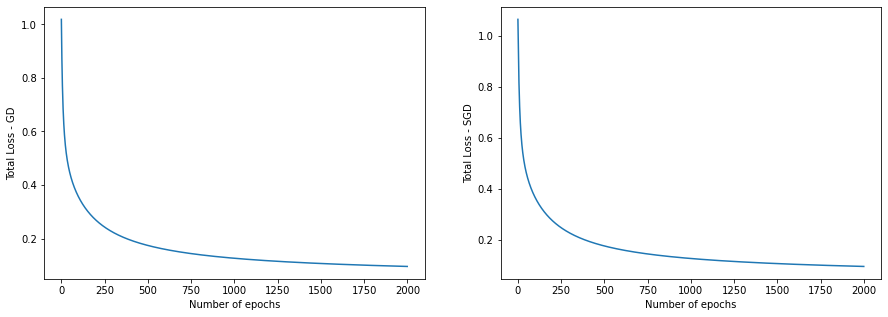

In [22]:
import matplotlib.pyplot as plt

#Comparing loss GD and SGD

plt.figure(figsize = (15,5))
plt.subplot(121)
plt.plot(np.arange(num_epochs),loss)
plt.xlabel("Number of epochs")
plt.ylabel("Total Loss - GD")

plt.subplot(122)
plt.plot(np.arange(num_epochs),loss_sgd)
plt.xlabel("Number of epochs")
plt.ylabel("Total Loss - SGD")
plt.show()

In [23]:
print('Weights - Batch Gradient descent: ',weights)
print('Weights - Stochastic gradient descent: ',weights_sgd)

Weights - Batch Gradient descent:  [[ 2.20844646  3.58154642 -2.39350083 -0.60471481  1.54272386]
 [ 1.93438497  0.97668406  0.83466087 -0.55586504  2.05030822]
 [-0.86595789 -1.40640597  4.71786048  4.20758827 -0.54423015]]
Weights - Stochastic gradient descent:  [[ 2.29350122  3.62413741 -2.31102236 -0.56959955  1.55468922]
 [ 2.03937489  1.00428881  0.89745592 -0.50149184  2.03929877]
 [-0.78850864 -1.37711063  4.852453    4.20505549 -0.51376314]]


In [24]:
#return predictions based on weights
def predict_multiclass_regression(weight_vector,X):
  
  pred = []
  for i in range(len(X)):
    arr = []
    for j in range(len(weight_vector)):
      arr.append(np.dot(weight_vector[j],X[i]))
    arr = softmax(arr)
    pred.append(np.argmax(arr))

  return pred

def convert_Y_test(Y_test):
  test = np.array(Y_test)
  Y_test = [np.argmax(i) for i in test]
  
  return Y_test

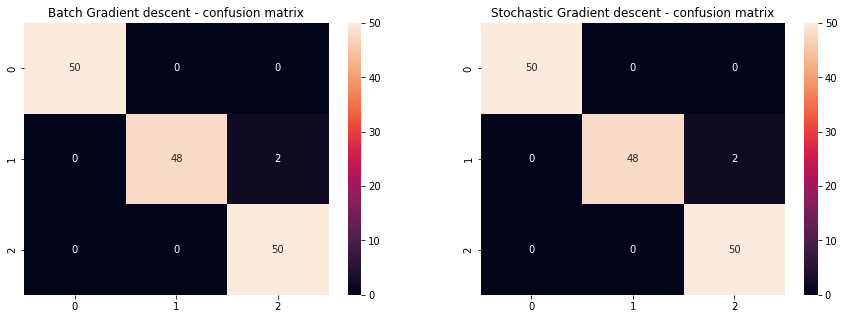

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
#Plotting the confusion matrix for both SGD and GD

cm = confusion_matrix(convert_Y_test(Y),predict_multiclass_regression(weights,np.array(X)))
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.title("Batch Gradient descent - confusion matrix")
sns.heatmap(cm, annot = True, cbar = True)

cm_sgd = confusion_matrix(convert_Y_test(Y),predict_multiclass_regression(weights_sgd,np.array(X)))
plt.subplot(122)
plt.title("Stochastic Gradient descent - confusion matrix")
sns.heatmap(cm, annot = True, cbar = True)
plt.show()

In [26]:
from sklearn.metrics import accuracy_score


print("Accuracy obtained from batch gradient descent: ", accuracy_score(convert_Y_test(Y),predict_multiclass_regression(weights,np.array(X))))
print("Accuracy obtained from Stochastic gradient descent: ", accuracy_score(convert_Y_test(Y),predict_multiclass_regression(weights_sgd,np.array(X))))

Accuracy obtained from batch gradient descent:  0.9866666666666667
Accuracy obtained from Stochastic gradient descent:  0.98
